https://doi.org/10.1590/S1806-11172004000400003

*Numerical Investigation of 2D Turbulent Flow past a Circular Cylinder at Lower Subcritical Reynolds Number* (2020)

[*WebPlotDigitizer*](https://apps.automeris.io/wpd/)

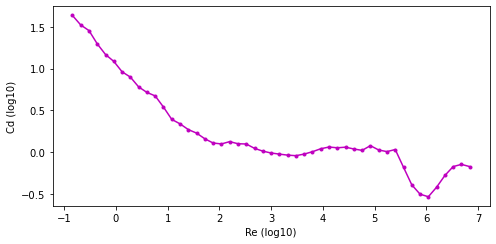

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

rows = []
with open("csv grafico.csv",'r') as file:
    reader = csv.reader(file)
    rows = [row for row in reader]

fig, ax = plt.subplots()
ax.plot(data[0], data[1], linestyle='solid', marker='.', color='m')

plt.xlabel('Re (log10)')
plt.ylabel('Cd (log10)')

plt.show()

***

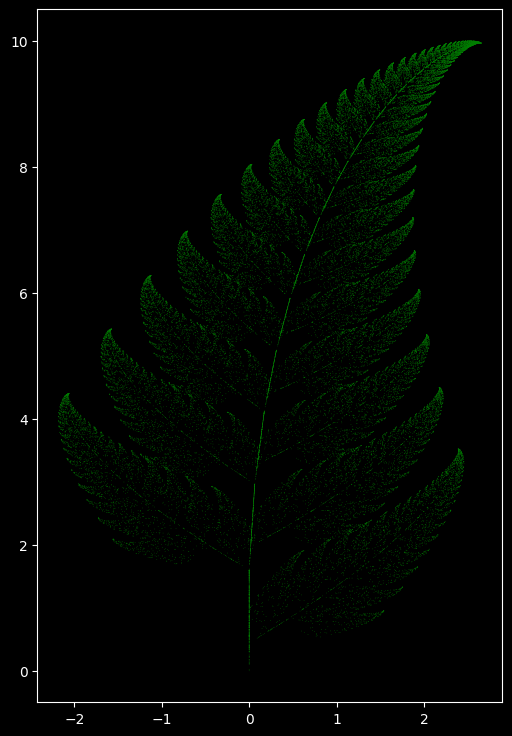

In [1]:
#chaos game, barnsley fern

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

def f1(x, y):
    return 0, 0.16 * y
def f2(x, y):
    return 0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.6
def f3(x, y):
    return 0.2 * x - 0.26 * y, 0.23 * x + 0.22 * y + 1.6
def f4(x, y):
    return -0.15 * x + 0.28 * y, 0.26 * x + 0.24 * y + 0.44

functions = [f1, f2, f3, f4]
probabilities = [0.01, 0.85, 0.07, 0.07]

distribution = rv_discrete(name='dist', values=(range(4), probabilities))

num_points = 50000
x, y = np.zeros(num_points), np.zeros(num_points)

for i in range(1, num_points):
    f = functions[distribution.rvs()]
    x[i], y[i] = f(x[i - 1], y[i - 1])

plt.style.use('dark_background')
plt.figure(figsize=(6, 9))
plt.scatter(x, y, s=0.2, color='green', marker='o', edgecolor='none')
plt.axis()
plt.show()

***

$\int_{0}^{4} \sqrt{x}~dx$ com o método do ponto médio composto

In [ ]:
#1

a=0
b=4
n=3**8 #intervalo
dx = (b-a)/n #altura do retângulo

I = 0

for i in range(1,n):
    I+=((a+dx/2)+i*dx)**0.5 #função x^0.5
I*=dx

print("valor da integração:", I)

import math
I_real = 5+1/3 #valor calculado para a integral
E = I_real - I
r = math.log(E)/(math.log(dx)) #supondo K = 1
print("valor da taxa:", r)

valor da integração: 5.333323601671408
valor da taxa: 1.5589279060221957


In [ ]:
#2

a=0.1
b=4
n=3**8 #intervalo
dx = (b-a)/n #altura do retângulo

I = 0

for i in range(1,n):
    I+=((a+dx/2)+i*dx)**0.5 #função x^0.5
I*=dx

print("valor da integração:", I)


I_real = 5+1/3 #valor calculado para a integral

import math
I_real = 5+1/3 #valor calculado para a integral
E = I_real - I
r = math.log(E)/(math.log(dx)) #supondo K = 1
print("valor da taxa:", r)

valor da integração: 5.31206325012388
valor da taxa: 0.5183756458530108


***

`adaptative_integration(f, a, b, eps, method=midpoint)`

$\int_{0}^{2} x^2~dx$ e $\int_{0}^{2} \sqrt{x}~dx$,  para $\epsilon = 10^{-1}$ e $\epsilon = 10^{-10}$.

In [7]:
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

from numpy import linspace, zeros, sqrt, log

def adaptive_integration(f, a, b, eps, method='midpoint'):
    n_limit = 1000000
    n = 2
    integral_n = midpoint(f, a, b, n)
    c = 1

    while True:
        n *= 2
        integral_2n = midpoint(f, a, b, n)
        diff = abs(integral_2n - integral_n)

        if diff <= eps or n >= n_limit:
            break
        integral_n = integral_2n
        c += 1

    if diff <= eps:
        print(f"aproximação = {integral_2n}, número de subintervalos = {n}")
        return integral_2n, n
    else:
        print("erro: limite de subintervalos atingido.")
        return None, n


In [8]:
def application():

    def f(x):
        return x**2
    def g(x):
        return x**0.5

    eps = 1E-1
    a = 0
    b = 2

    n = adaptive_integration(f, a, b, eps, 'midpoint')
    m = adaptive_integration(g, a, b, eps, 'midpoint')

print('com e=10^-1')

if __name__ == '__main__':
    application()

com e=10^-1
aproximação = 2.65625, número de subintervalos = 8
aproximação = 1.9034675240333143, número de subintervalos = 4


In [9]:
import math

def application():

    def f(x):
        return x**2
    def g(x):
        return x**0.5

    eps = 10E-10
    a = 0
    b = 2

    n = adaptive_integration(f, a, b, eps, 'midpoint')
    m = adaptive_integration(g, a, b, eps, 'midpoint')

print('com e=10^-10')

if __name__ == '__main__':
    application()

com e=10^-10
aproximação = 2.6666666665114462, número de subintervalos = 65536
aproximação = 1.8856180836176275, número de subintervalos = 524288
